This notebook Calculates the solution of the size distribution from PBE approach

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import bayes_mvs as bayesest
from tqdm import tqdm
from scipy.stats import gamma

In [2]:
lenarr=8000 #number of points in the lattice
mu=np.log(2) #Growth rate
deltat=(20/(mu*lenarr))*np.log(2) #Time step
cv=0.1#coefficient of variation of the initial size distribution
x0=1 #Mean size as initial condition
shape=1/cv**2 #shape parameter of the gamma distribution
scale=x0/shape #Scale Parameter of gamma distribution
k=np.log(2) #Division rate

In [3]:

def ev(dist,x):#For estimating the size distribution at single cell level, use this function
    ddist=np.zeros(len(dist))
    ddist2=np.zeros(len(dist))
    ddist3=np.zeros(len(dist))
    for i in range(1,len(dist)):
        jumprate=(1-k*x[i-1]*deltat)
        ddist[i]=jumprate*dist[i-1]
    for i in range(len(dist)-400):
        ddist3[i]=k*x[i+400]*dist[i+400]*deltat
    return ddist+ddist3

def evpop(dist,x):#For estimating the size distribution at population level, use this function
    ddist=np.zeros(len(dist))
    ddist2=np.zeros(len(dist))
    ddist3=np.zeros(len(dist))
    for i in range(1,len(dist)):
        jumprate=(1-k*x[i-1]*deltat)
        ddist[i]=jumprate*dist[i-1]
    for i in range(len(dist)-400):
        ddist3[i]=2*k*x[i+400]*dist[i+400]*deltat
    return ddist+ddist3

In [56]:
x=2**(-6) #smallest size in the grid
dx=x*mu*deltat #initial grisd width
xarr=np.zeros(lenarr) #Array of sizes
distarr=np.zeros(lenarr) #Array for distribution
dxarr=np.zeros(lenarr) #array of latice width
for i in range(lenarr):
    xarr[i]=x
    dxarr[i]=dx
    distarr[i]=gamma.pdf(x,a=shape,scale=scale)*dx#Initial condition, size being gamma distribution
    x+=dx
    dx=x*mu*deltat

t=0
tmax=10
steps=int(tmax/deltat)
n=0
for stp in (range(steps)):
    distarr=ev(distarr,xarr)
    t+=deltat
    tref+=deltat

In [40]:
from PyEcoLib.PopSimulator import PopSimulator

meanbirthsize = 1 # mean size at birth  
gr=np.log(2) #Growth rate
tmax = 10  
sample_time = 0.01 #min 
div_steps = 1 #Division steps
ncells = 1000 #Number of colonies

cv=0.1
v0=np.random.gamma(shape=1/cv**2,scale=cv**2,size=ncells) #Array of initial sizes

sim = PopSimulator(ncells=ncells,gr = gr, sb=meanbirthsize, steps = div_steps,nu=1,V0array=v0) #Initializing the simulator
sim.szdyn(tmax = tmax, sample_time = 1, FileName=  "./datanu1.csv", DivEventsFile="./DivEventsnu1.csv")

Text(0, 0.5, 'Distribution')

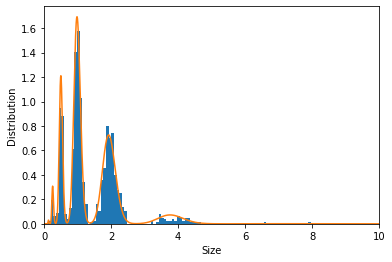

In [57]:
data=pd.read_csv("./datanu1.csv")
t=data.Time.unique()[-1]
datat=data[data.Time==t]

plt.hist(datat.Size,bins=100,density=True)
plt.plot(xarr,distarr/dxarr)
plt.xlim(0,10)
plt.xlabel('Size')
plt.ylabel('Distribution')

In [19]:
#Estimating the size distribution moments
mn=np.trapz((distarr/dxarr)*xarr,x=xarr)#Estimating the mean from distribution
print(f'Mean={mn}')
mn2=np.trapz((distarr/dxarr)*xarr*xarr,x=xarr)
var=mn2-mn**2
print(f'Variance={var}')

Mean=1.4390939890288263
Variance=0.7990692685330472


In [ ]:

from scipy.stats import beta
def betadist(i,CV2=0.001):
    a=(2*(1/CV2-1))
    b=a
    x=0.25*np.exp(mu*deltat*np.arange(0,800))
    dx=x*mu*deltat#(np.exp(mu*deltat)-1)
    y=beta.pdf(x,a=a,b=b)*dx
    #print(np.sum(y))
    return y[i]

Solution for population snapshots

In [49]:
x=2**(-6) #smallest size in the grid
dx=x*mu*deltat #initial grisd width
xarr=np.zeros(lenarr) #Array of sizes
distarr=np.zeros(lenarr) #Array for distribution
dxarr=np.zeros(lenarr) #array of latice width
for i in range(lenarr):
    xarr[i]=x
    dxarr[i]=dx
    distarr[i]=gamma.pdf(x,a=shape,scale=scale)*dx#Initial condition, size being gamma distribution
    x+=dx
    dx=x*mu*deltat
t=0
tmax=5
steps=int(tmax/deltat)
n=0
for stp in (range(steps)):
    distarr=evpop(distarr,xarr)
    t+=deltat
    tref+=deltat

In [48]:
from PyEcoLib.PopSimulator import PopSimulator

meanbirthsize = 1 # mean size at birth  
gr=np.log(2) #Growth rate
tmax = 5  
sample_time = 0.01 #min 
div_steps = 1 #Division steps
ncells = 100 #Number of colonies

cv=0.1
v0=np.random.gamma(shape=1/cv**2,scale=cv**2,size=ncells) #Array of initial sizes

sim = PopSimulator(ncells=ncells,gr = gr, sb=meanbirthsize, steps = div_steps,nu=2,V0array=v0) #Initializing the simulator
sim.szdyn(tmax = tmax, sample_time = 1, FileName=  "./datanu2.csv", DivEventsFile="./DivEventsnu2.csv")

Text(0, 0.5, 'Distribution')

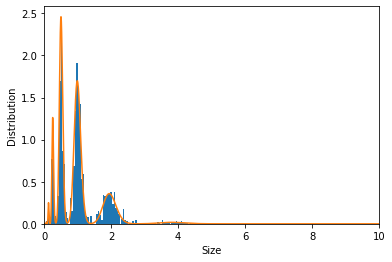

In [54]:
data=pd.read_csv("./datanu2.csv")
t=data.Time.unique()[-1]
datat=data[data.Time==t]

plt.hist(datat.Size,bins=100,density=True)


plt.plot(xarr,distarr*(1/np.sum(distarr))/dxarr)
plt.xlim(0,10)
plt.xlabel('Size')
plt.ylabel('Distribution')

In [30]:
#Estimating the size distribution moments
N=np.sum(distarr)#Population
mn=np.trapz((distarr/dxarr)*xarr/N,x=xarr)#Estimating the mean from distribution
print(f'Mean={mn}')
mn2=np.trapz((distarr/dxarr)*xarr*xarr/N,x=xarr)
var=mn2-mn**2
print(f'Variance={var}')

Mean=0.9975749813985709
Variance=0.44090001961699055
